In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/DACON/소득예측")
os.getcwd()

'/content/drive/MyDrive/DACON/소득예측'

In [10]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# OLS

## 전처리 데이터 로드

In [4]:
train = pd.read_csv("train_preprocessed.csv")
test = pd.read_csv("test_preprocessed.csv")

display(train.shape, train.head(2))
display(test.shape, test.head(2))

(20000, 34)

,Age,Gender,Working_Week (Yearly),Industry_Status,Hispanic_Origin,Household_Summary,Losses,Associates degree (Academic),Associates degree (Vocational),Bachelors degree,Children,College,Doctorate degree,Elementary (1-4),Elementary (5-6),High Freshman,High Junior,High Senior,High Sophomore,High graduate,Kindergarten,Masters degree,Middle (7-8),Professional degree,Divorced,Married,Married (Armed Force Spouse),Married (Spouse Absent),Separated,Single,Widowed,US_Born,Occu+Employ,Income
0,6,1,4,20,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,13,425
1,3,1,52,6,0,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,13,0


(10000, 33)

,Age,Gender,Working_Week (Yearly),Industry_Status,Hispanic_Origin,Household_Summary,Losses,Associates degree (Academic),Associates degree (Vocational),Bachelors degree,Children,College,Doctorate degree,Elementary (1-4),Elementary (5-6),High Freshman,High Junior,High Senior,High Sophomore,High graduate,Kindergarten,Masters degree,Middle (7-8),Professional degree,Divorced,Married,Married (Armed Force Spouse),Married (Spouse Absent),Separated,Single,Widowed,US_Born,Occu+Employ
0,7,1,0,14,0,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,14
1,4,1,0,14,8,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,14


In [ ]:
X = train.drop('Income', axis=1)
y = train['Income']

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     173.1
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:23:10   Log-Likelihood:            -1.5706e+05
No. Observations:               20000   AIC:                         3.142e+05
Df Residuals:                   19968   BIC:                         3.144e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

> summary상 R^2 상관계수가 매우 낮아 p-value 값이 0.05 이상인 피쳐는 제거하기로 결정

## 컬럼 제거

In [5]:
drop_cols = ['Age', 'Industry_Status', 'Household_Summary', 'Doctorate degree', 'Elementary (1-4)', 'High Freshman', 'High Junior',
             'High Senior', 'High Sophomore', 'Kindergarten', 'Masters degree', 'Middle (7-8)', 'Professional degree', 'Divorced', 'Married (Spouse Absent)',
             'Separated', 'Single', 'Widowed', 'US_Born']

train.drop(columns = drop_cols, axis=1, inplace=True)
test.drop(columns = drop_cols, axis=1, inplace=True)

print(train.shape, test.shape)
display(train.head(2), test.head(2))

(20000, 15) (10000, 14)


,Gender,Working_Week (Yearly),Hispanic_Origin,Losses,Associates degree (Academic),Associates degree (Vocational),Bachelors degree,Children,College,Elementary (5-6),High graduate,Married,Married (Armed Force Spouse),Occu+Employ,Income
0,1,4,0,1,0,0,0,0,0,0,0,1,0,13,425
1,1,52,0,1,0,1,0,0,0,0,0,0,0,13,0


,Gender,Working_Week (Yearly),Hispanic_Origin,Losses,Associates degree (Academic),Associates degree (Vocational),Bachelors degree,Children,College,Elementary (5-6),High graduate,Married,Married (Armed Force Spouse),Occu+Employ
0,1,0,0,1,0,0,0,0,0,0,0,0,0,14
1,1,0,8,1,0,0,0,0,0,1,0,0,0,14


## 컬럼 제거 후 상관계수 재확인

In [ ]:
X= train.drop(["Income"],axis =1)
y= train["Income"]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     380.4
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:23:16   Log-Likelihood:            -1.5708e+05
No. Observations:               20000   AIC:                         3.142e+05
Df Residuals:                   19985   BIC:                         3.143e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

> R^2 값이 더 떨어짐  
F-statistic 증가,  
AIC 값 변화없음으로  
=> 컬럼 삭제가 유의미하지 않아 표준화를 진행해보기로 함

# Pipeline 모델 선택

In [6]:
print(train.shape, test.shape)
display(train.head(2), test.head(2))

(20000, 15) (10000, 14)


,Gender,Working_Week (Yearly),Hispanic_Origin,Losses,Associates degree (Academic),Associates degree (Vocational),Bachelors degree,Children,College,Elementary (5-6),High graduate,Married,Married (Armed Force Spouse),Occu+Employ,Income
0,1,4,0,1,0,0,0,0,0,0,0,1,0,13,425
1,1,52,0,1,0,1,0,0,0,0,0,0,0,13,0


,Gender,Working_Week (Yearly),Hispanic_Origin,Losses,Associates degree (Academic),Associates degree (Vocational),Bachelors degree,Children,College,Elementary (5-6),High graduate,Married,Married (Armed Force Spouse),Occu+Employ
0,1,0,0,1,0,0,0,0,0,0,0,0,0,14
1,1,0,8,1,0,0,0,0,0,1,0,0,0,14


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

## 표준화

In [ ]:
# train = pd.read_csv("train_preprocessed.csv")
# test = pd.read_csv("test_preprocessed.csv")

X= train.drop(["Income"],axis =1)
y= train["Income"]

In [ ]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])


pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}


for pipe in pipelines:
    pipe.fit(X, y)

In [ ]:
results = []

for i, model in enumerate(pipelines):
    score = cross_val_score(model, X, y, scoring="neg_root_mean_squared_error", cv=10)
    results.append(score)
    print("%s: %f " % (pipe_dict[i], score.mean()))

LinearRegression: -622.428105 
DecisionTree: -705.230752 
RandomForest: -645.625086 
KNeighbors: -669.263159 
XGBRegressor: -635.350836 


> RMSE의 경우 값이 낮을수록 모델의 예측 성능이 우수한 것으로 평가.  
- DecisionTree가 더 낮은 값인 줄 알았으나 cross_val_score 함수에서 사용된 scoring 옵션이 neg_root_mean_squared_error이기 때문에, 결과값은 RMSE의 음수인 것. 따라서 -622.715454 (선형 회귀)가 -825.113392 (결정 트리)보다 더 큰 값이므로, 선형 회귀 모델이 결정 트리 모델보다 더 낮은 RMSE를 보여, 더 좋은 성능을 나타내는 걸로 판단되고, 이는 선형 회귀가 이 데이터셋에 대해 더 적합한 모델이라는 것

## 정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler

pipeline_lr=Pipeline([("scalar1", MinMaxScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",MinMaxScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",MinMaxScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",MinMaxScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",MinMaxScaler()),
                     ("rf_classifier",XGBRegressor())])


pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}


for pipe in pipelines:
    pipe.fit(X, y)

In [ ]:
results = []

for i, model in enumerate(pipelines):
    score = cross_val_score(model, X, y, scoring="neg_root_mean_squared_error", cv=10)
    results.append(score)
    print("%s: %f " % (pipe_dict[i], score.mean()))

LinearRegression: -622.428105 
DecisionTree: -703.451402 
RandomForest: -646.229691 
KNeighbors: -669.369958 
XGBRegressor: -635.350836 


> - MinMaxScaler와 StandardScaler와의 결과가 큰 차이가 없지만
- MinMaxScaler값이 전체적인 모델의 결과로는 미세하게 나아짐

# Decison Tree

In [ ]:
# 독립변수와 종속변수 분리
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=2024)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# 객체생성
model = DecisionTreeRegressor()

# 학습
model.fit(X_train, y_train)

# 예측
pred = model.predict(X_test)
pred

array([ 534.80952381,    0.        ,    0.        , ...,    0.        ,
          0.        , 1784.        ])

## 모델 평가

In [ ]:
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 521996.15816946275
Mean Absolute Error (MAE): 404.32558483652195
R^2 Score: 0.07006149738116463


> R^2 상관계수가 낮게 나와 다른 모델링도 진행

# Standarization 과 절편 확인

## 데이터 로드

In [ ]:
# train = pd.read_csv("train_preprocessed.csv")
# test = pd.read_csv("test_preprocessed.csv")

# display(train.shape, train.head(2))
# display(test.shape, test.head(2))

In [ ]:
print(train.shape, test.shape)
display(train.head(2), test.head(2))

(20000, 15) (10000, 14)


,Gender,Working_Week (Yearly),Hispanic_Origin,Losses,Associates degree (Academic),Associates degree (Vocational),Bachelors degree,Children,College,Elementary (5-6),High graduate,Married,Married (Armed Force Spouse),Occu+Employ,Income
0,1,4,0,1,0,0,0,0,0,0,0,1,0,13,425
1,1,52,0,1,0,1,0,0,0,0,0,0,0,13,0


,Gender,Working_Week (Yearly),Hispanic_Origin,Losses,Associates degree (Academic),Associates degree (Vocational),Bachelors degree,Children,College,Elementary (5-6),High graduate,Married,Married (Armed Force Spouse),Occu+Employ
0,1,0,0,1,0,0,0,0,0,0,0,0,0,14
1,1,0,8,1,0,0,0,0,0,1,0,0,0,14


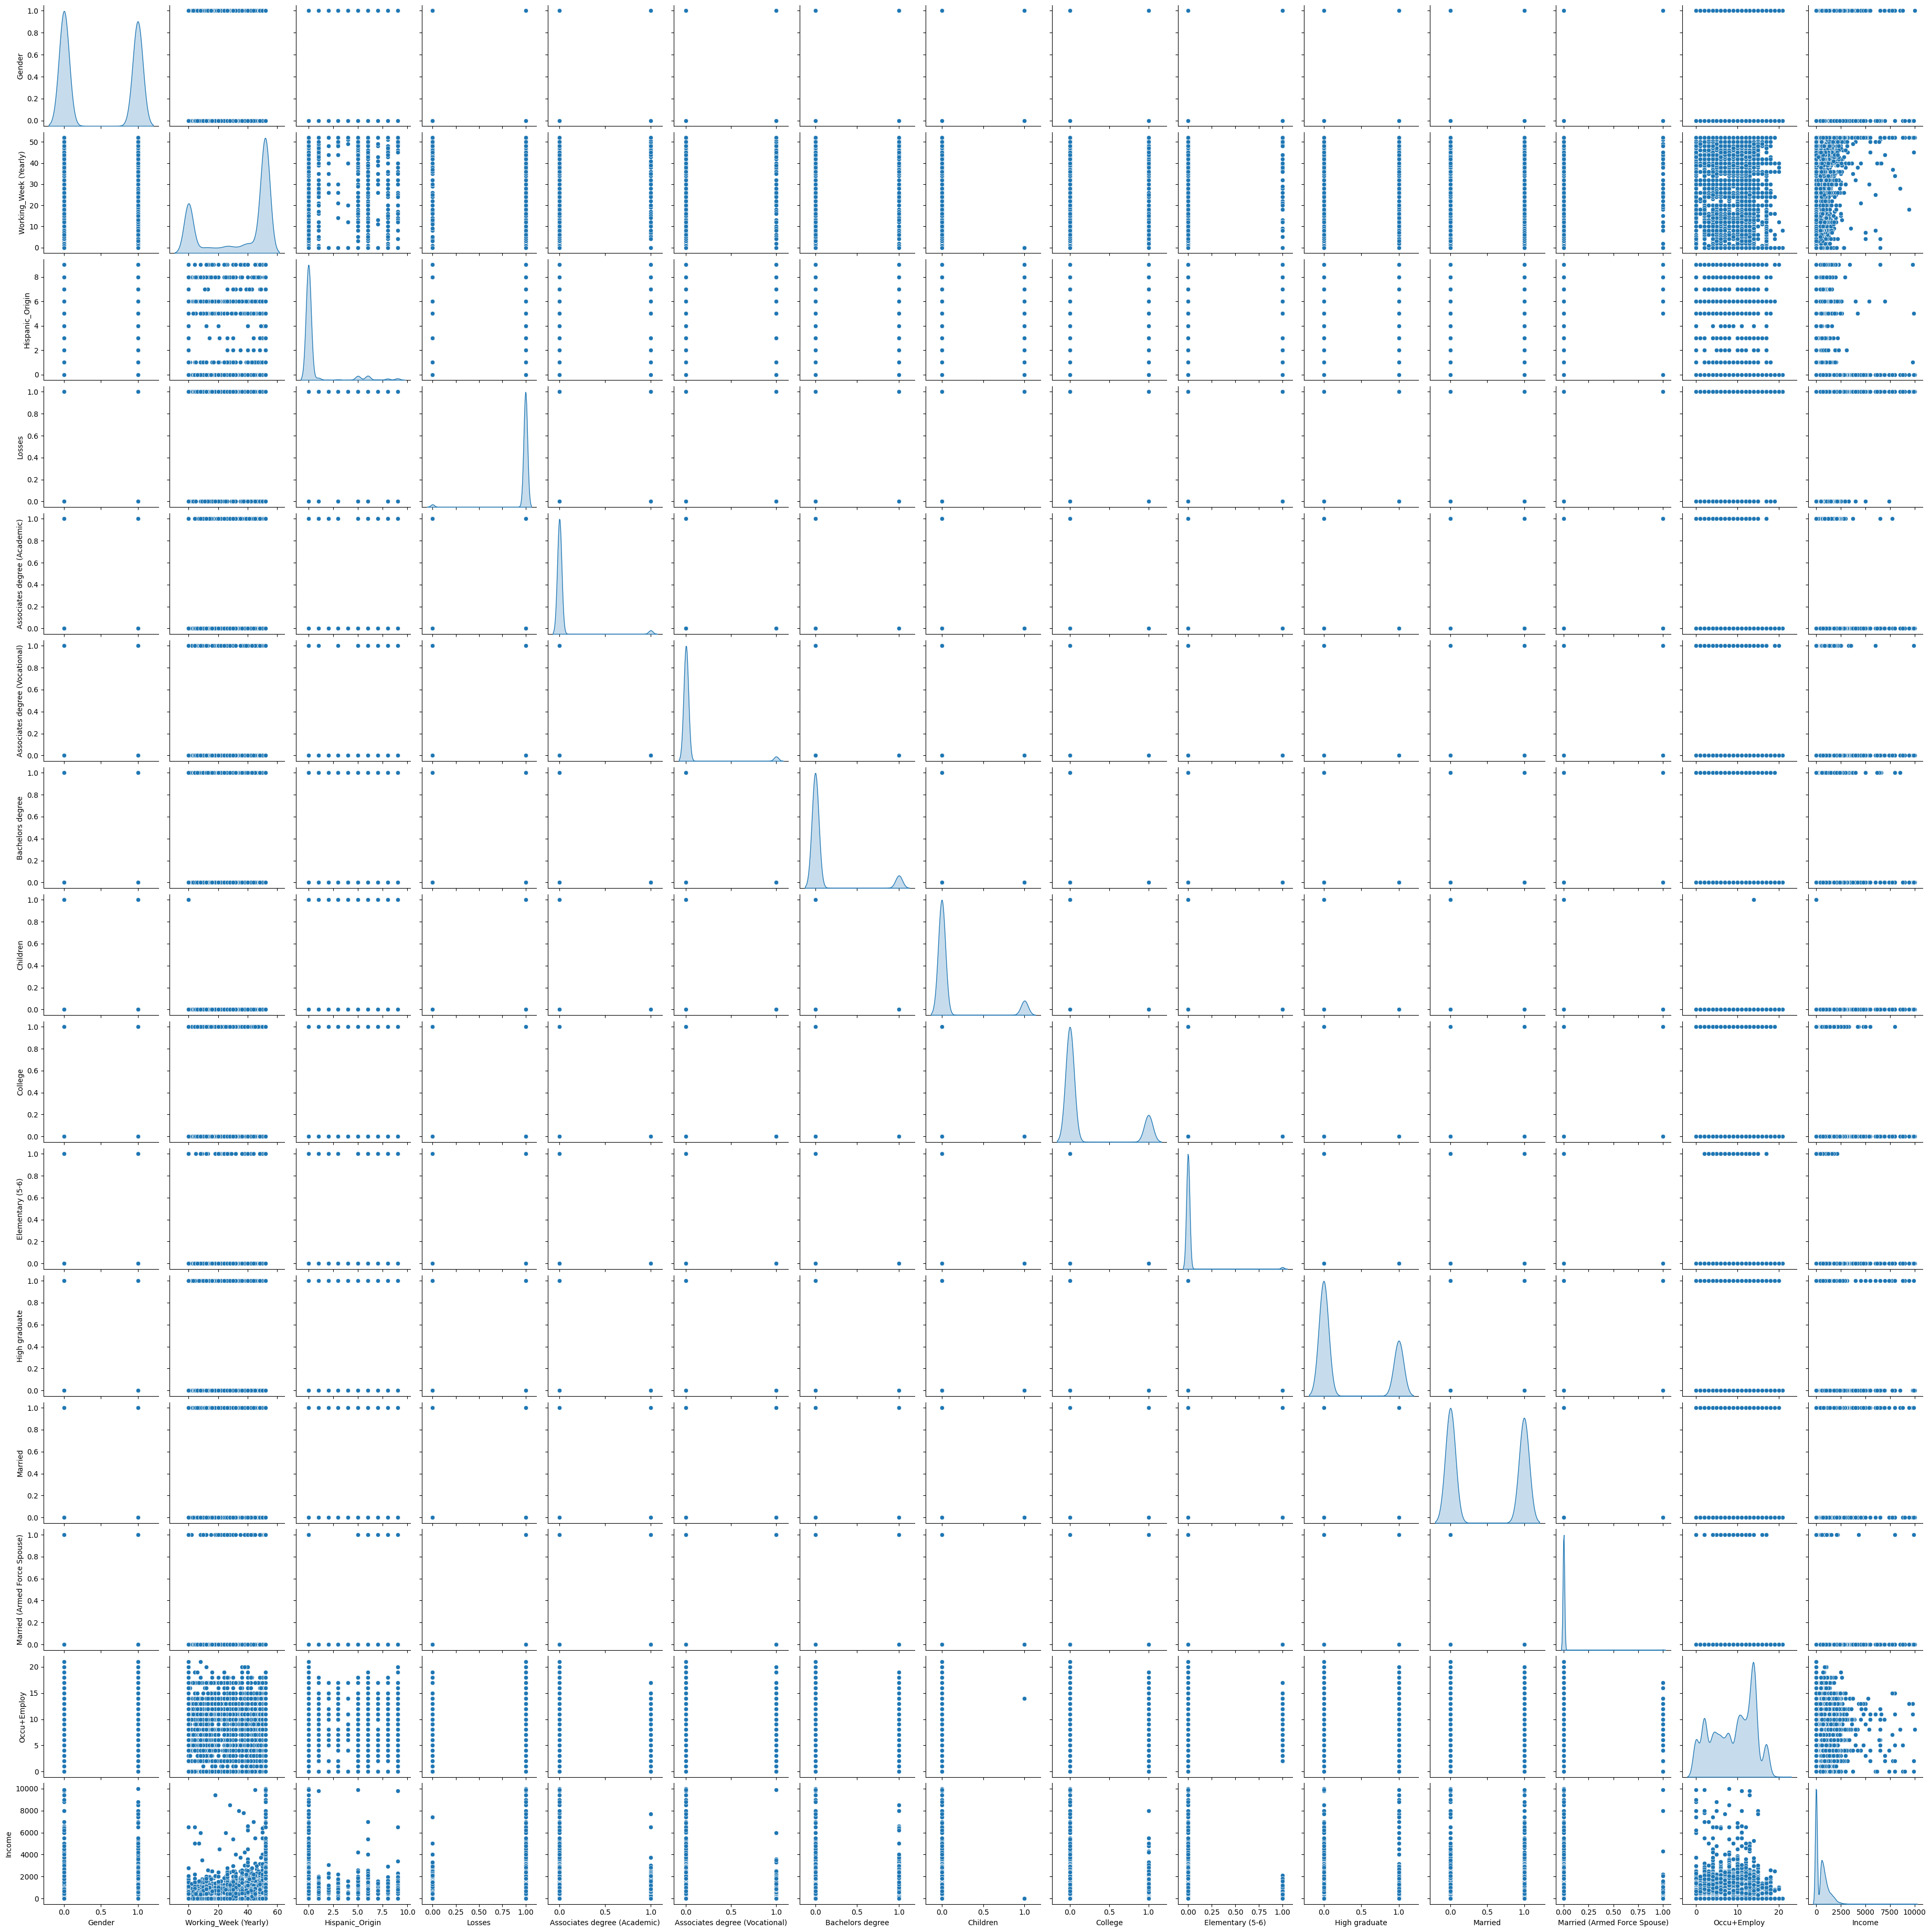

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data=train, kind='scatter', diag_kind='kde')
plt.show()

## 데이터 분리

In [ ]:
# 독립변수와 종속변수 분리
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

# 학습용, 평가용 데이터 생성
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 2024)

In [ ]:
### 학습용 데이터의 자료형과 형태 확인
print(f'학습용 X 데이터의 자료형 : {type(X_train)}')
print(f'학습용 X 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 y 데이터의 자료형 : {type(y_train)}')
print(f'학습용 y 데이터의 모양 : {y_train.shape}')

학습용 X 데이터의 자료형 : <class 'pandas.core.frame.DataFrame'>
학습용 X 데이터의 모양 : (14000, 14)
--------------------------------------------------------------------------------
학습용 y 데이터의 자료형 : <class 'pandas.core.series.Series'>
학습용 y 데이터의 모양 : (14000,)


In [ ]:
### 평가용 데이터의 자료형과 형태 확인
print(f'평가용 X 데이터의 자료형 : {type(X_test)}')
print(f'평가용 X 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 y 데이터의 자료형 : {type(y_test)}')
print(f'평가용 y 데이터의 모양 : {y_test.shape}')

평가용 X 데이터의 자료형 : <class 'pandas.core.frame.DataFrame'>
평가용 X 데이터의 모양 : (6000, 14)
--------------------------------------------------------------------------------
평가용 y 데이터의 자료형 : <class 'pandas.core.series.Series'>
평가용 y 데이터의 모양 : (6000,)


## 정규화

In [ ]:
# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# scaling 적용
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

display(X_train_scaled, X_test_scaled)

array([[0.        , 1.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.47619048],
       [0.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.28571429],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.80952381],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.80952381],
       [0.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.52380952]])

array([[1.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.52380952],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.66666667],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.66666667],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.66666667],
       [1.        , 0.57692308, 0.        , ..., 1.        , 0.        ,
        0.47619048],
       [0.        , 0.73076923, 0.66666667, ..., 0.        , 1.        ,
        0.57142857]])

## 표준화
> - Pipeline결과에 따라 정규화로 결정

In [ ]:
# # StandardScaler 객체 생성
# scaler = StandardScaler()

# # scaling 적용
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# display(X_train_scaled, X_test_scaled)

# LinearRegression()

In [ ]:
# 선형 회귀 모델 생성
lr = LinearRegression()
lr_scaled = LinearRegression()

# 학습
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# 기울기, 절편 확인
print("스케일링 진행 X")
print("lr 기울기\n", lr.coef_)
print("\n lr 절편\n ==> ", lr.intercept_)

print('='*80)


print("스케일링(표준화) 진행 O")
print("lr_scaled 기울기\n", lr_scaled.coef_)
print("\n lr_scaled 절편\n ==> ", lr_scaled.intercept_)

스케일링 진행 X
lr 기울기
 [  96.71851132    8.6754933   -10.94748549  -76.20386479  180.69169168
  232.49137227  124.92110055  -58.71399906   82.76763271 -133.09913197
   80.74553521   65.66417136  170.75316254  -18.78216375]

 lr 절편
 ==>  359.6374043750502
스케일링(표준화) 진행 O
lr_scaled 기울기
 [  96.71851132  451.1256516   -98.52736945  -76.20386479  180.69169168
  232.49137227  124.92110055  -58.71399906   82.76763271 -133.09913197
   80.74553521   65.66417136  170.75316254 -394.42543866]

 lr_scaled 절편
 ==>  359.6374043750494


> 표준화를 진행하지 않은 절편이 진행한 절편보다 나은 값이며 둘 간의 큰 차이가 없음  
따라서 절편값이 그나마 낮은 => 스케일링 진행하지 않은 데이터를 선택하여 예측 진행

In [ ]:
pred = lr.predict(X_test)
pred

array([624.67390131,  58.48775941, -38.23075191, ..., -38.23075191,
       601.02701652, 673.4762613 ])

In [ ]:
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 453130.59970734006
Mean Absolute Error (MAE): 392.0628748996904
R^2 Score: 0.1927457993937588


## 성능 개선 - L2 규제 적용 - GridSearchCV
- 독립변수간의 상호작용이 큰 경우라 생각하여 L2(Ridge) 규제를 적용하여 성능 개선 진행

In [ ]:
ridge = Ridge()
params = {'alpha': [0.01, 0.1, 1.0, 10.0]}

grid = GridSearchCV(ridge, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

best_models = grid.best_estimator_
best_models

Ridge(alpha=10.0)

In [ ]:
best_models.fit(X_train, y_train)

pred = best_models.predict(X_test)
pred

array([626.89918129,  58.63644452, -37.39625993, ..., -37.39625993,
       600.24345161, 642.05947551])

In [ ]:
ridge_mse = mean_squared_error(y_test, pred)
ridge_mae = mean_absolute_error(y_test, pred)
ridge_r2 = r2_score(y_test, pred)

print("MSE:", ridge_mse)
print("MAE:", ridge_mae)
print("R^2 상관계수:", ridge_r2)

MSE: 453264.80201321637
MAE: 391.9936477950201
R^2 상관계수: 0.1925067173824807


> 규제 적용한 모델의 상관계수가 더 떨어짐

## 성능 개선 - L2 규제 적용 (2) - Pipeline

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(degree=2), Ridge())

model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([ 5.34695631e+02,  4.71473935e+00, -5.46013241e-01, ...,
       -5.46013241e-01,  6.76815901e+02,  3.82339491e+02])

In [ ]:
print("R^2:", model.score(X_test, y_test))

R^2: 0.20159818640179772


# RandomForest

In [14]:
print(train.shape, test.shape)
display(train.head(2), test.head(2))

(20000, 15) (10000, 14)


,Gender,Working_Week (Yearly),Hispanic_Origin,Losses,Associates degree (Academic),Associates degree (Vocational),Bachelors degree,Children,College,Elementary (5-6),High graduate,Married,Married (Armed Force Spouse),Occu+Employ,Income
0,1,4,0,1,0,0,0,0,0,0,0,1,0,13,425
1,1,52,0,1,0,1,0,0,0,0,0,0,0,13,0


,Gender,Working_Week (Yearly),Hispanic_Origin,Losses,Associates degree (Academic),Associates degree (Vocational),Bachelors degree,Children,College,Elementary (5-6),High graduate,Married,Married (Armed Force Spouse),Occu+Employ
0,1,0,0,1,0,0,0,0,0,0,0,0,0,14
1,1,0,8,1,0,0,0,0,0,1,0,0,0,14


In [15]:
# 독립변수와 종속변수 분리
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

# 학습용, 평가용 데이터 생성
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 2024)

In [16]:
model = RandomForestRegressor(n_estimators=100, random_state=2024)

model.fit(X_train, y_train)

pred = model.predict(X_test)

## 모델 평가

In [17]:
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 472080.64593856584
Mean Absolute Error (MAE): 382.66332884435974
R^2 Score: 0.15898620683541131


## 성능 개선 - GridSearch

In [19]:
# 독립변수와 종속변수 분리
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

# 학습용, 평가용 데이터 생성
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 2024)

In [20]:
# 20분
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(random_state=2024)

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
best_rf

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=300, random_state=2024)

In [21]:
# 모델 학습
best_rf.fit(X_train, y_train)

# 학습된 모델을 사용하여 예측
pred = best_rf.predict(X_test)

# 성능 평가
mse_rf = mean_squared_error(y_test, pred)
mae_rf = mean_absolute_error(y_test, pred)
r2_rf = r2_score(y_test, pred)

print(f'mse_rf = {mse_rf}, \nmae_rf = {mae_rf}, \nr2_rf = {r2_rf}')

mse_rf = 442569.9926497567, 
mae_rf = 365.8142300318776, 
r2_rf = 0.21155956834622436


# RandomForest (2) - MinMaxScaling

In [7]:
print(train.shape, test.shape)
display(train.head(2), test.head(2))

(20000, 15) (10000, 14)


,Gender,Working_Week (Yearly),Hispanic_Origin,Losses,Associates degree (Academic),Associates degree (Vocational),Bachelors degree,Children,College,Elementary (5-6),High graduate,Married,Married (Armed Force Spouse),Occu+Employ,Income
0,1,4,0,1,0,0,0,0,0,0,0,1,0,13,425
1,1,52,0,1,0,1,0,0,0,0,0,0,0,13,0


,Gender,Working_Week (Yearly),Hispanic_Origin,Losses,Associates degree (Academic),Associates degree (Vocational),Bachelors degree,Children,College,Elementary (5-6),High graduate,Married,Married (Armed Force Spouse),Occu+Employ
0,1,0,0,1,0,0,0,0,0,0,0,0,0,14
1,1,0,8,1,0,0,0,0,0,1,0,0,0,14


In [8]:
# 독립변수와 종속변수 분리
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

# 학습용, 평가용 데이터 생성
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2024)

In [13]:
# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# scaling 적용
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=2024)
rf.fit(X_train_scaled, y_train.values.ravel())
pred = rf.predict(X_test_scaled)

# 평가
mse = mean_squared_error(y_test, pred)
print("Mean Squared Error:", mse)

r2_rf = r2_score(y_test, pred)
print("R^2:", r2_rf)

Mean Squared Error: 426715.0746782805
R^2: 0.17635300880195848


# 결론

> **최종 선택 모델은 GridSearch로 파라미터값을 조정한 RandomForest** 회귀 모델로, 모델의 설명력은 0.21로 낮지만 Decision Tree, L2 규제로 성능 개선을 시도했던 LinearRegressor 모델보다 나은 설명력을 보임